# 과제 - Fast Gradient Signed Method

**템플릿**

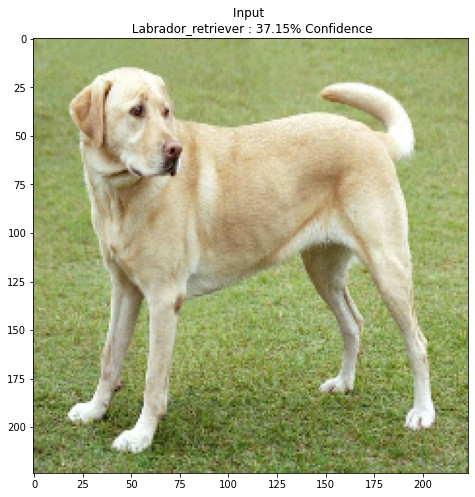

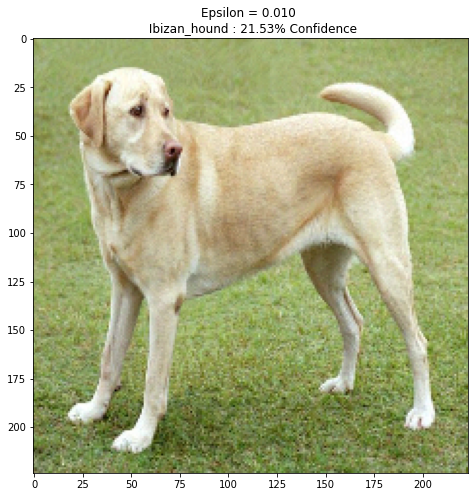

Ibizan_hound 0.21529235
[('n02099712', 'Labrador_retriever', 0.37154654), ('n02109961', 'Eskimo_dog', 0.06487835), ('n02099601', 'golden_retriever', 0.029010495), ('n02110185', 'Siberian_husky', 0.020057056)]
[208 248 207 250]

class name = Labrador_retriever , class index = 208
class name = Eskimo_dog , class index = 248
class name = golden_retriever , class index = 207
class name = Siberian_husky , class index = 250


In [151]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                 weights='imagenet')
pretrained_model.trainable = False

# ImageNet 클래스 레이블
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# 이미지가 MobileNetV2에 사용하기 위한 level normalization 및 size normalization 함수
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image

# 예측 결과로부터 top1을 뽑아서 라벨을 출력하는 함수
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

# Labrador Retreiver 이미지 불러오기
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
# 추론 
image_probs = pretrained_model.predict(image)

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # 입력 이미지에 대한 손실 함수의 기울기를 구합니다.
  gradient = tape.gradient(loss, input_image)
  # 왜곡을 생성하기 위해 그래디언트의 부호를 구합니다.
  signed_grad = tf.sign(gradient)
  return signed_grad

# 인식하고 이미지 출력하는 함수 (label과 confidence를 반환하도록 변경)
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()
  return label, confidence

# 이미지의 레이블 위치만 1로 설정 (기본적인 클래스 분류기 결과)
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

label1 = label2 = label3 = 'abc'

# 공격 패턴 생성
perturbations = create_adversarial_pattern(image, label)

# epsilon을 변경하면서 결과 관찰
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

#원본 인식 (epsilon = 0)
display_images(image, descriptions[0])

#공격 진행
adv_x = image + eps*perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
label0, confidence0 = display_images(adv_x, descriptions[1]) # epsilon = 0.01

# FSGM 결과 
print(label0, confidence0)

res = decode_predictions(image_probs, top=4)
print(res[0])
# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]
# top4만을 출력
print(top[:4])

# 추론 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)

# model predict의 결과인 `image_probs[0]`에는 무엇이 들어있습니까? 
ans01 = '''
여기에 기입합니다.
'''

# np.argsort(image_probs[0])[::-1]는 무엇을 얻기 위한 것입니까?
ans02 = '''
여기에 기입합니다.
'''

# top2 결과인 `eskimo_dog`의 class index는 얼마입니까?
ans03 = -1 # 값을 변경해 주세요.

# 원본이미지를 인식하였을 때, 4번째로 높은 추론값을 가진 결과(top4)는 무엇이었습니까?
# 인덱스 값으로 적어 주세요
ans04 = -1 # 값을 변경해 주세요.

    
# 이곳에 top1 index를 이용한 code snippte을 추가합니다.

# 이곳에 top2 index를 이용한 code snippte을 수정하여 추가합니다.

# 이곳에 top3 index를 이용한 code snippte을 수정하여 추가합니다.

# 공격 결과를 다음 변수에 기록합니다.
ans06 = label1
ans07 = label2
ans08 = label3


**과제 내용**  

이번 과제는 FGSM에 대한 것입니다. 

템플릿의 코드는 `13_fun_topics.ipynb` 실습 코드와 거의 동일합니다.  

다만 $\epsilon$을 0.01로 고정하였습니다.

1. FGSM의 개요  
   원본 이미지(Labrado retriever)를 추론하고 원본 Label(208번)을 이용한 학습데이터 생성  
   추론값, GT(208 one-hot-encoding)를 이용한 손실함수의 정의(cross entropy)  
   실함수를 모델의 weights가 아닌 입력 이미지에 대해 gradient 계산 => perturbation으로 정의  
   원본 이미지에 $\epsilon$*pertrubation을 더하기 (빼기의 반대방향)하여 공격 완성

2. 원본 이미지에 공격 pattern을 주입함으로서 결과 추론을 어렵게 하였습니다.  
   이것은 원래 추론결과와 다른 결과를 만들어 내는 것이 공격의 목표였습니다.  
   이를 이용하여, 원하는 결과를 도출할 수 있는 간단한 실험을 해 보도록 하겠습니다.  
   원리는 다음과 같습니다.  
   먼저 target label을 선정합니다.  
   다음은 추론 결과와 target label을 이용하여 손실함수(cross entropy)를 정의합니다. 
   이것을 이용한 gradient를 계산하고 부호부분만을 계산하여 target_perturbation을 정의합니다.  
   원본 이미지에 $\epsilon$*target_pertrubation을 빼기 하여 target의 확률을 높입니다.
   
3. FGSM은 매우 간단한 공격 방법으로 임의의 라벨로 변경하기는 까다롭습니다.  
   따라서 원래 원본 이미지의 결과 중에서 원래 결과인 top1대신 top2, top3, top4를 선택하여 공격자가 원하는 결과로 바꿔 보도록 하겠습니다.  
   이를 위하여 template에서 top1부터 top4까지의 결과 및 label index를 출력하도록 템플릿에 마지막 코드를 추가해 두었습니다.  
```python
res = decode_predictions(image_probs, top=4)
print(res[0])
# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]
# top4만을 출력
print(top[:4])
# pred(추론) 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)
```
    위의 템플릿 코드를 읽고 분석합니다.  
    model predict의 결과인 `image_probs[0]`에는 무엇이 들어있습니까? `ans01`에 기입합니다. 
    이것을 이용하여 `np.argsort(image_probs[0])[::-1]`는 무엇을 얻기 위한 것입니까? `ans02`에 기입합니다.
    top1 결과는 당연히 Labrado retriever입니다.
    top2 결과인 `eskimo_dog`의 class index는 얼마입니까? `ans03`에 index값을 기록합니다.  
    원본이미지를 인식하였을 때, 4번째로 높은 추론값을 가진 결과(top4)는 무엇이었습니까?   
    그 index 값을 `ans04`에 기록합니다.  
    참고로 강의에서 소개하였던 2010년부터의 imagenet competition은 top5내에 정답이 있으면, 맞는 것으로 하였었습니다.  
    
4. 이제 top2의 index를 이용하여, 원본 이미지에 대한 gradient를 구하고 그 부호값만을 취하여 target1_perturabtion으로 정의하겠습니다.  
다음의 code snippet을 템플릿의 맨 뒤에 추가합니다.    
```python
#top2 용 label 생성
target1_index = 248 # eskimo dog
target1_label = tf.one_hot(target1_index, image_probs.shape[-1])
target1_label = tf.reshape(target1_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target1_perturbations = create_adversarial_pattern(image, target1_label)
adv_x = image - eps*target1_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
label1, confidence1 = display_images(adv_x, descriptions[1])
# FSGM 결과 
print(label1, confidence1)
```

    `adv_x`를 계산할 때 `image - eps*target1_perturbations`에서 보듯이 `-`(minus)가 사용되었습니다.  
    `label1`의 결과를 `ans06`에 저장합니다.  
    
5. 동일하게 top3와 top4의 index를 이용한 공격코드 및 결과코드를 추가합니다.  
   (code_snippet에서 target2_index, target3_index를 생성하여 사용하시면 됩니다.)  
   top3의 label을 이용한 결과인 `label2`를 `ans07`에, top4의 label을 이용한 `label3`를 `ans08`에 추가합니다.  
   원하는 공격 결과가 도출되었습니까?  
    
    


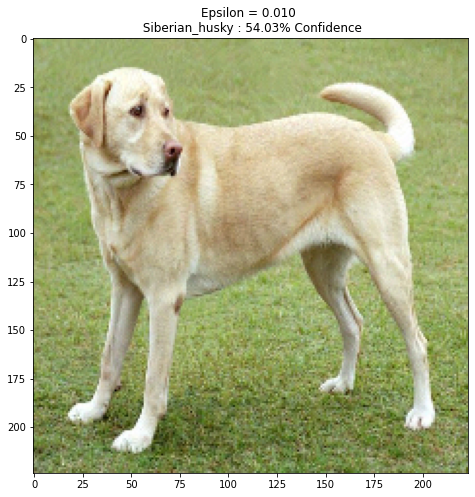

Siberian_husky 0.54033476


In [150]:
#top2 용 label 생성
target1_index = 248 # eskimo dog
target1_index = 207 # golden retriever
target1_index = 250 # siberian huskey
target1_label = tf.one_hot(target1_index, image_probs.shape[-1])
target1_label = tf.reshape(target1_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target1_perturbations = create_adversarial_pattern(image, target1_label)
adv_x = image - eps*target1_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
label1, confidence1 = display_images(adv_x, descriptions[1])
# FSGM 결과 
print(label1, confidence1)

In [110]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # 입력 이미지에 대한 손실 함수의 기울기를 구합니다.
  gradient = tape.gradient(loss, input_image)
  # 왜곡을 생성하기 위해 그래디언트의 부호를 구합니다.
  signed_grad = tf.sign(gradient)
  return signed_grad

# 이미지의 레이블 위치만 1로 설정 (기본적인 클래스 분류기 결과)
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

# 공격 패턴 생성
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0])
plt.show()

# 인식하고 이미지 출력
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

# epsilon을 변경하면서 결과 관찰
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

#원본 인식
display_images(image, descriptions[i])

# eps: 0.01에 대해서만 수행
eps = epsilons[1]

#공격 진행
adv_x = image + eps*perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
display_images(adv_x, descriptions[i])

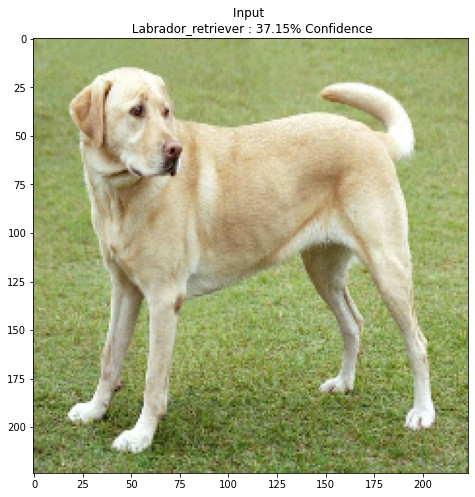

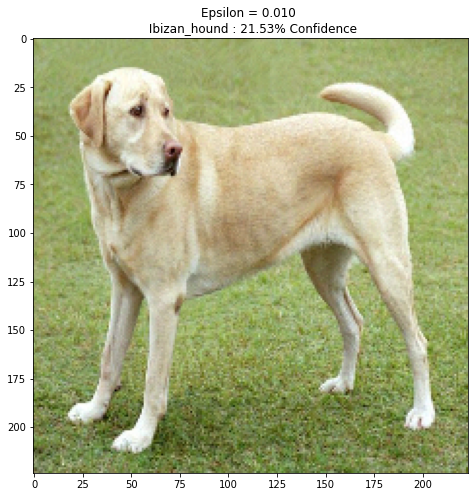

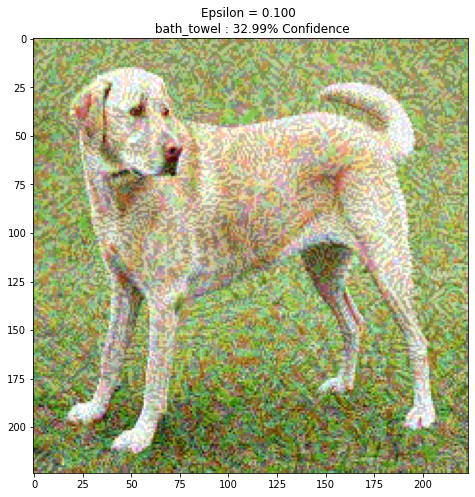

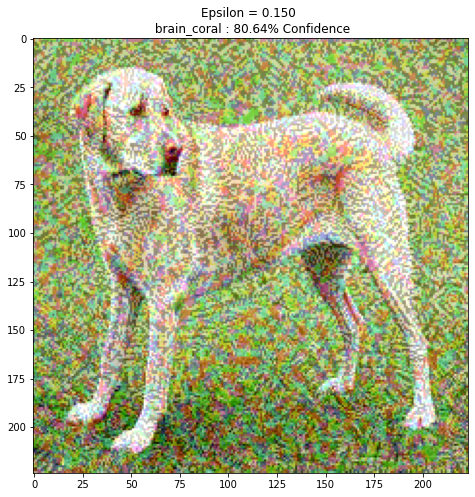

In [4]:
# epsilon을 변경하면서 결과 관찰
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  display_images(adv_x, descriptions[i])

In [6]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz

--2021-11-20 22:12:00--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.144.245
접속 s3.amazonaws.com (s3.amazonaws.com)|52.216.144.245|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 341663724 (326M) [application/x-tar]
Saving to: ‘imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.83M  7.49MB/s    in 83s     

2021-11-20 22:13:24 (3.93 MB/s) - ‘imagenette2-320.tgz’ saved [341663724/341663724]



In [7]:
!tar xvzf imagenette2-320.tgz

imagenette2-320/
imagenette2-320/train/
imagenette2-320/noisy_imagenette.csv
imagenette2-320/val/
imagenette2-320/val/n03394916/
imagenette2-320/val/n03417042/
imagenette2-320/val/n03445777/
imagenette2-320/val/n02102040/
imagenette2-320/val/n03425413/
imagenette2-320/val/n03888257/
imagenette2-320/val/n03028079/
imagenette2-320/val/n03000684/
imagenette2-320/val/n01440764/
imagenette2-320/val/n02979186/
imagenette2-320/val/n02979186/n02979186_7492.JPEG
imagenette2-320/val/n02979186/n02979186_491.JPEG
imagenette2-320/val/n02979186/n02979186_24591.JPEG
imagenette2-320/val/n02979186/n02979186_26451.JPEG
imagenette2-320/val/n02979186/n02979186_11372.JPEG
imagenette2-320/val/n02979186/n02979186_1792.JPEG
imagenette2-320/val/n02979186/n02979186_22111.JPEG
imagenette2-320/val/n02979186/n02979186_18450.JPEG
imagenette2-320/val/n02979186/n02979186_2002.JPEG
imagenette2-320/val/n02979186/n02979186_21910.JPEG
imagenette2-320/val/n02979186/n02979186_9232.JPEG
imagenette2-320/val/n02979186/n029791

imagenette2-320/val/n02979186/n02979186_12140.JPEG
imagenette2-320/val/n02979186/n02979186_13950.JPEG
imagenette2-320/val/n02979186/n02979186_3260.JPEG
imagenette2-320/val/n02979186/n02979186_1932.JPEG
imagenette2-320/val/n02979186/n02979186_3372.JPEG
imagenette2-320/val/n02979186/n02979186_6520.JPEG
imagenette2-320/val/n02979186/n02979186_2830.JPEG
imagenette2-320/val/n02979186/n02979186_9790.JPEG
imagenette2-320/val/n02979186/n02979186_10151.JPEG
imagenette2-320/val/n02979186/n02979186_18131.JPEG
imagenette2-320/val/n02979186/n02979186_13442.JPEG
imagenette2-320/val/n02979186/n02979186_2172.JPEG
imagenette2-320/val/n02979186/n02979186_70.JPEG
imagenette2-320/val/n02979186/n02979186_5822.JPEG
imagenette2-320/val/n02979186/n02979186_24592.JPEG
imagenette2-320/val/n02979186/n02979186_27582.JPEG
imagenette2-320/val/n02979186/n02979186_23650.JPEG
imagenette2-320/val/n02979186/n02979186_1841.JPEG
imagenette2-320/val/n02979186/n02979186_21401.JPEG
imagenette2-320/val/n02979186/n02979186_290

imagenette2-320/val/n01440764/n01440764_9981.JPEG
imagenette2-320/val/n01440764/n01440764_2271.JPEG
imagenette2-320/val/n01440764/n01440764_11211.JPEG
imagenette2-320/val/n01440764/ILSVRC2012_val_00021740.JPEG
imagenette2-320/val/n01440764/n01440764_7531.JPEG
imagenette2-320/val/n01440764/n01440764_14802.JPEG
imagenette2-320/val/n01440764/n01440764_30331.JPEG
imagenette2-320/val/n01440764/n01440764_31170.JPEG
imagenette2-320/val/n01440764/n01440764_7462.JPEG
imagenette2-320/val/n01440764/n01440764_3421.JPEG
imagenette2-320/val/n01440764/n01440764_14402.JPEG
imagenette2-320/val/n01440764/n01440764_8451.JPEG
imagenette2-320/val/n01440764/n01440764_10380.JPEG
imagenette2-320/val/n01440764/n01440764_6361.JPEG
imagenette2-320/val/n01440764/n01440764_12702.JPEG
imagenette2-320/val/n01440764/n01440764_16192.JPEG
imagenette2-320/val/n01440764/n01440764_292.JPEG
imagenette2-320/val/n01440764/n01440764_5490.JPEG
imagenette2-320/val/n01440764/n01440764_1980.JPEG
imagenette2-320/val/n01440764/n014

imagenette2-320/val/n03000684/n03000684_8140.JPEG
imagenette2-320/val/n03000684/n03000684_17261.JPEG
imagenette2-320/val/n03000684/n03000684_9182.JPEG
imagenette2-320/val/n03000684/n03000684_9881.JPEG
imagenette2-320/val/n03000684/n03000684_11511.JPEG
imagenette2-320/val/n03000684/n03000684_4401.JPEG
imagenette2-320/val/n03000684/n03000684_16542.JPEG
imagenette2-320/val/n03000684/n03000684_10212.JPEG
imagenette2-320/val/n03000684/n03000684_13982.JPEG
imagenette2-320/val/n03000684/n03000684_34171.JPEG
imagenette2-320/val/n03000684/n03000684_10992.JPEG
imagenette2-320/val/n03000684/n03000684_2202.JPEG
imagenette2-320/val/n03000684/n03000684_18321.JPEG
imagenette2-320/val/n03000684/n03000684_14882.JPEG
imagenette2-320/val/n03000684/n03000684_17200.JPEG
imagenette2-320/val/n03000684/n03000684_1300.JPEG
imagenette2-320/val/n03000684/n03000684_13541.JPEG
imagenette2-320/val/n03000684/n03000684_1290.JPEG
imagenette2-320/val/n03000684/n03000684_900.JPEG
imagenette2-320/val/n03000684/n03000684_

imagenette2-320/val/n03028079/n03028079_4672.JPEG
imagenette2-320/val/n03028079/n03028079_24602.JPEG
imagenette2-320/val/n03028079/n03028079_532.JPEG
imagenette2-320/val/n03028079/n03028079_9810.JPEG
imagenette2-320/val/n03028079/n03028079_1870.JPEG
imagenette2-320/val/n03028079/n03028079_6462.JPEG
imagenette2-320/val/n03028079/n03028079_9580.JPEG
imagenette2-320/val/n03028079/n03028079_322.JPEG
imagenette2-320/val/n03028079/n03028079_36351.JPEG
imagenette2-320/val/n03028079/n03028079_29362.JPEG
imagenette2-320/val/n03028079/n03028079_26202.JPEG
imagenette2-320/val/n03028079/n03028079_1372.JPEG
imagenette2-320/val/n03028079/n03028079_108321.JPEG
imagenette2-320/val/n03028079/n03028079_30381.JPEG
imagenette2-320/val/n03028079/n03028079_7422.JPEG
imagenette2-320/val/n03028079/n03028079_3932.JPEG
imagenette2-320/val/n03028079/n03028079_32580.JPEG
imagenette2-320/val/n03028079/n03028079_2342.JPEG
imagenette2-320/val/n03028079/n03028079_30030.JPEG
imagenette2-320/val/n03028079/n03028079_304

imagenette2-320/val/n03888257/n03888257_51872.JPEG
imagenette2-320/val/n03888257/n03888257_10892.JPEG
imagenette2-320/val/n03888257/n03888257_46572.JPEG
imagenette2-320/val/n03888257/n03888257_19830.JPEG
imagenette2-320/val/n03888257/n03888257_29090.JPEG
imagenette2-320/val/n03888257/n03888257_10980.JPEG
imagenette2-320/val/n03888257/n03888257_12401.JPEG
imagenette2-320/val/n03888257/n03888257_19471.JPEG
imagenette2-320/val/n03888257/n03888257_35621.JPEG
imagenette2-320/val/n03888257/n03888257_1251.JPEG
imagenette2-320/val/n03888257/n03888257_12801.JPEG
imagenette2-320/val/n03888257/n03888257_36631.JPEG
imagenette2-320/val/n03888257/n03888257_59412.JPEG
imagenette2-320/val/n03888257/n03888257_4842.JPEG
imagenette2-320/val/n03888257/n03888257_22330.JPEG
imagenette2-320/val/n03888257/n03888257_11450.JPEG
imagenette2-320/val/n03888257/n03888257_32911.JPEG
imagenette2-320/val/n03888257/ILSVRC2012_val_00025121.JPEG
imagenette2-320/val/n03888257/n03888257_43782.JPEG
imagenette2-320/val/n0388

imagenette2-320/val/n03425413/n03425413_21162.JPEG
imagenette2-320/val/n03425413/n03425413_2210.JPEG
imagenette2-320/val/n03425413/n03425413_15082.JPEG
imagenette2-320/val/n03425413/n03425413_13382.JPEG
imagenette2-320/val/n03425413/n03425413_19760.JPEG
imagenette2-320/val/n03425413/n03425413_12710.JPEG
imagenette2-320/val/n03425413/n03425413_17210.JPEG
imagenette2-320/val/n03425413/n03425413_14650.JPEG
imagenette2-320/val/n03425413/n03425413_251.JPEG
imagenette2-320/val/n03425413/n03425413_20122.JPEG
imagenette2-320/val/n03425413/n03425413_13642.JPEG
imagenette2-320/val/n03425413/n03425413_8670.JPEG
imagenette2-320/val/n03425413/n03425413_15000.JPEG
imagenette2-320/val/n03425413/n03425413_19131.JPEG
imagenette2-320/val/n03425413/n03425413_13232.JPEG
imagenette2-320/val/n03425413/n03425413_13770.JPEG
imagenette2-320/val/n03425413/n03425413_14670.JPEG
imagenette2-320/val/n03425413/n03425413_16972.JPEG
imagenette2-320/val/n03425413/n03425413_16421.JPEG
imagenette2-320/val/n03425413/n0342

imagenette2-320/val/n02102040/n02102040_2950.JPEG
imagenette2-320/val/n02102040/n02102040_3212.JPEG
imagenette2-320/val/n02102040/n02102040_5850.JPEG
imagenette2-320/val/n02102040/n02102040_4742.JPEG
imagenette2-320/val/n02102040/n02102040_1110.JPEG
imagenette2-320/val/n02102040/n02102040_742.JPEG
imagenette2-320/val/n02102040/n02102040_312.JPEG
imagenette2-320/val/n02102040/n02102040_6682.JPEG
imagenette2-320/val/n02102040/n02102040_5942.JPEG
imagenette2-320/val/n02102040/n02102040_4650.JPEG
imagenette2-320/val/n02102040/n02102040_4980.JPEG
imagenette2-320/val/n02102040/n02102040_7841.JPEG
imagenette2-320/val/n02102040/n02102040_2340.JPEG
imagenette2-320/val/n02102040/n02102040_6180.JPEG
imagenette2-320/val/n02102040/n02102040_4851.JPEG
imagenette2-320/val/n02102040/n02102040_1612.JPEG
imagenette2-320/val/n02102040/n02102040_4410.JPEG
imagenette2-320/val/n02102040/n02102040_3290.JPEG
imagenette2-320/val/n02102040/n02102040_2481.JPEG
imagenette2-320/val/n02102040/n02102040_810.JPEG
ima

imagenette2-320/val/n02102040/n02102040_6880.JPEG
imagenette2-320/val/n02102040/n02102040_7792.JPEG
imagenette2-320/val/n02102040/n02102040_3381.JPEG
imagenette2-320/val/n02102040/n02102040_940.JPEG
imagenette2-320/val/n02102040/n02102040_6992.JPEG
imagenette2-320/val/n02102040/n02102040_1241.JPEG
imagenette2-320/val/n02102040/n02102040_690.JPEG
imagenette2-320/val/n02102040/n02102040_2302.JPEG
imagenette2-320/val/n02102040/n02102040_901.JPEG
imagenette2-320/val/n02102040/n02102040_1980.JPEG
imagenette2-320/val/n02102040/n02102040_1200.JPEG
imagenette2-320/val/n02102040/n02102040_281.JPEG
imagenette2-320/val/n02102040/n02102040_4901.JPEG
imagenette2-320/val/n02102040/ILSVRC2012_val_00017370.JPEG
imagenette2-320/val/n02102040/n02102040_4560.JPEG
imagenette2-320/val/n02102040/n02102040_7931.JPEG
imagenette2-320/val/n02102040/n02102040_4872.JPEG
imagenette2-320/val/n02102040/n02102040_521.JPEG
imagenette2-320/val/n02102040/n02102040_171.JPEG
imagenette2-320/val/n02102040/n02102040_6770.JP

imagenette2-320/val/n03445777/n03445777_6721.JPEG
imagenette2-320/val/n03445777/n03445777_2332.JPEG
imagenette2-320/val/n03445777/n03445777_15880.JPEG
imagenette2-320/val/n03445777/n03445777_110.JPEG
imagenette2-320/val/n03445777/n03445777_3060.JPEG
imagenette2-320/val/n03445777/n03445777_16192.JPEG
imagenette2-320/val/n03445777/n03445777_392.JPEG
imagenette2-320/val/n03445777/n03445777_4930.JPEG
imagenette2-320/val/n03445777/n03445777_8010.JPEG
imagenette2-320/val/n03445777/n03445777_17042.JPEG
imagenette2-320/val/n03445777/n03445777_8552.JPEG
imagenette2-320/val/n03445777/n03445777_3471.JPEG
imagenette2-320/val/n03445777/n03445777_3922.JPEG
imagenette2-320/val/n03445777/n03445777_8790.JPEG
imagenette2-320/val/n03445777/n03445777_16491.JPEG
imagenette2-320/val/n03445777/n03445777_6761.JPEG
imagenette2-320/val/n03445777/n03445777_8840.JPEG
imagenette2-320/val/n03445777/n03445777_8641.JPEG
imagenette2-320/val/n03445777/n03445777_1460.JPEG
imagenette2-320/val/n03445777/n03445777_5862.JPE

imagenette2-320/val/n03417042/ILSVRC2012_val_00033842.JPEG
imagenette2-320/val/n03417042/n03417042_1182.JPEG
imagenette2-320/val/n03417042/n03417042_27680.JPEG
imagenette2-320/val/n03417042/n03417042_22482.JPEG
imagenette2-320/val/n03417042/n03417042_6581.JPEG
imagenette2-320/val/n03417042/n03417042_4292.JPEG
imagenette2-320/val/n03417042/n03417042_5600.JPEG
imagenette2-320/val/n03417042/n03417042_5180.JPEG
imagenette2-320/val/n03417042/n03417042_12560.JPEG
imagenette2-320/val/n03417042/n03417042_3280.JPEG
imagenette2-320/val/n03417042/n03417042_2491.JPEG
imagenette2-320/val/n03417042/n03417042_6981.JPEG
imagenette2-320/val/n03417042/n03417042_29722.JPEG
imagenette2-320/val/n03417042/n03417042_20962.JPEG
imagenette2-320/val/n03417042/n03417042_27931.JPEG
imagenette2-320/val/n03417042/n03417042_90.JPEG
imagenette2-320/val/n03417042/n03417042_12002.JPEG
imagenette2-320/val/n03417042/n03417042_4420.JPEG
imagenette2-320/val/n03417042/n03417042_5362.JPEG
imagenette2-320/val/n03417042/n03417

imagenette2-320/val/n03394916/n03394916_35320.JPEG
imagenette2-320/val/n03394916/n03394916_38841.JPEG
imagenette2-320/val/n03394916/n03394916_37171.JPEG
imagenette2-320/val/n03394916/n03394916_46931.JPEG
imagenette2-320/val/n03394916/n03394916_8060.JPEG
imagenette2-320/val/n03394916/n03394916_35731.JPEG
imagenette2-320/val/n03394916/n03394916_27560.JPEG
imagenette2-320/val/n03394916/n03394916_33221.JPEG
imagenette2-320/val/n03394916/n03394916_57530.JPEG
imagenette2-320/val/n03394916/n03394916_42732.JPEG
imagenette2-320/val/n03394916/n03394916_30231.JPEG
imagenette2-320/val/n03394916/n03394916_32522.JPEG
imagenette2-320/val/n03394916/n03394916_28590.JPEG
imagenette2-320/val/n03394916/n03394916_39102.JPEG
imagenette2-320/val/n03394916/n03394916_33260.JPEG
imagenette2-320/val/n03394916/n03394916_36432.JPEG
imagenette2-320/val/n03394916/n03394916_43532.JPEG
imagenette2-320/val/n03394916/n03394916_15352.JPEG
imagenette2-320/val/n03394916/n03394916_71910.JPEG
imagenette2-320/val/n03394916/n0

imagenette2-320/train/n02979186/n02979186_11918.JPEG
imagenette2-320/train/n02979186/n02979186_7743.JPEG
imagenette2-320/train/n02979186/n02979186_10036.JPEG
imagenette2-320/train/n02979186/n02979186_3429.JPEG
imagenette2-320/train/n02979186/n02979186_14999.JPEG
imagenette2-320/train/n02979186/n02979186_10523.JPEG
imagenette2-320/train/n02979186/n02979186_469.JPEG
imagenette2-320/train/n02979186/n02979186_21784.JPEG
imagenette2-320/train/n02979186/n02979186_2516.JPEG
imagenette2-320/train/n02979186/n02979186_8818.JPEG
imagenette2-320/train/n02979186/n02979186_12375.JPEG
imagenette2-320/train/n02979186/n02979186_10718.JPEG
imagenette2-320/train/n02979186/n02979186_18328.JPEG
imagenette2-320/train/n02979186/n02979186_23078.JPEG
imagenette2-320/train/n02979186/n02979186_5396.JPEG
imagenette2-320/train/n02979186/n02979186_4704.JPEG
imagenette2-320/train/n02979186/n02979186_5545.JPEG
imagenette2-320/train/n02979186/n02979186_15019.JPEG
imagenette2-320/train/n02979186/n02979186_2853.JPEG
ima

imagenette2-320/train/n02979186/n02979186_7585.JPEG
imagenette2-320/train/n02979186/n02979186_2338.JPEG
imagenette2-320/train/n02979186/n02979186_569.JPEG
imagenette2-320/train/n02979186/n02979186_3529.JPEG
imagenette2-320/train/n02979186/n02979186_27479.JPEG
imagenette2-320/train/n02979186/n02979186_5404.JPEG
imagenette2-320/train/n02979186/n02979186_1447.JPEG
imagenette2-320/train/n02979186/ILSVRC2012_val_00047315.JPEG
imagenette2-320/train/n02979186/n02979186_16277.JPEG
imagenette2-320/train/n02979186/n02979186_12664.JPEG
imagenette2-320/train/n02979186/n02979186_894.JPEG
imagenette2-320/train/n02979186/n02979186_10874.JPEG
imagenette2-320/train/n02979186/n02979186_16559.JPEG
imagenette2-320/train/n02979186/ILSVRC2012_val_00040604.JPEG
imagenette2-320/train/n02979186/n02979186_25956.JPEG
imagenette2-320/train/n02979186/n02979186_21915.JPEG
imagenette2-320/train/n02979186/n02979186_11859.JPEG
imagenette2-320/train/n02979186/n02979186_8518.JPEG
imagenette2-320/train/n02979186/n0297918

imagenette2-320/train/n01440764/n01440764_3614.JPEG
imagenette2-320/train/n01440764/n01440764_9649.JPEG
imagenette2-320/train/n01440764/n01440764_31715.JPEG
imagenette2-320/train/n01440764/n01440764_10048.JPEG
imagenette2-320/train/n01440764/n01440764_16348.JPEG
imagenette2-320/train/n01440764/ILSVRC2012_val_00011993.JPEG
imagenette2-320/train/n01440764/n01440764_9864.JPEG
imagenette2-320/train/n01440764/n01440764_5514.JPEG
imagenette2-320/train/n01440764/n01440764_20915.JPEG
imagenette2-320/train/n01440764/n01440764_14549.JPEG
imagenette2-320/train/n01440764/n01440764_2117.JPEG
imagenette2-320/train/n01440764/n01440764_12188.JPEG
imagenette2-320/train/n01440764/n01440764_8849.JPEG
imagenette2-320/train/n01440764/n01440764_7929.JPEG
imagenette2-320/train/n01440764/ILSVRC2012_val_00024327.JPEG
imagenette2-320/train/n01440764/n01440764_13275.JPEG
imagenette2-320/train/n01440764/n01440764_13625.JPEG
imagenette2-320/train/n01440764/n01440764_11566.JPEG
imagenette2-320/train/n01440764/n0144

imagenette2-320/train/n01440764/n01440764_12204.JPEG
imagenette2-320/train/n01440764/n01440764_4436.JPEG
imagenette2-320/train/n01440764/n01440764_3259.JPEG
imagenette2-320/train/n01440764/n01440764_2018.JPEG
imagenette2-320/train/n01440764/n01440764_6958.JPEG
imagenette2-320/train/n01440764/n01440764_4965.JPEG
imagenette2-320/train/n01440764/n01440764_8045.JPEG
imagenette2-320/train/n01440764/n01440764_5698.JPEG
imagenette2-320/train/n01440764/n01440764_13679.JPEG
imagenette2-320/train/n01440764/n01440764_239.JPEG
imagenette2-320/train/n01440764/n01440764_11486.JPEG
imagenette2-320/train/n01440764/n01440764_11469.JPEG
imagenette2-320/train/n01440764/n01440764_413.JPEG
imagenette2-320/train/n01440764/n01440764_3648.JPEG
imagenette2-320/train/n01440764/n01440764_5636.JPEG
imagenette2-320/train/n01440764/n01440764_10444.JPEG
imagenette2-320/train/n01440764/n01440764_16969.JPEG
imagenette2-320/train/n01440764/n01440764_7963.JPEG
imagenette2-320/train/n01440764/n01440764_13116.JPEG
imagene

imagenette2-320/train/n01440764/n01440764_8499.JPEG
imagenette2-320/train/n01440764/n01440764_11155.JPEG
imagenette2-320/train/n01440764/n01440764_10744.JPEG
imagenette2-320/train/n01440764/n01440764_12283.JPEG
imagenette2-320/train/n01440764/n01440764_12329.JPEG
imagenette2-320/train/n01440764/n01440764_9846.JPEG
imagenette2-320/train/n01440764/n01440764_11339.JPEG
imagenette2-320/train/n01440764/n01440764_13304.JPEG
imagenette2-320/train/n01440764/n01440764_9779.JPEG
imagenette2-320/train/n01440764/n01440764_3724.JPEG
imagenette2-320/train/n01440764/n01440764_9057.JPEG
imagenette2-320/train/n01440764/n01440764_25148.JPEG
imagenette2-320/train/n01440764/n01440764_4409.JPEG
imagenette2-320/train/n01440764/n01440764_3289.JPEG
imagenette2-320/train/n01440764/n01440764_10969.JPEG
imagenette2-320/train/n01440764/n01440764_7819.JPEG
imagenette2-320/train/n01440764/n01440764_3509.JPEG
imagenette2-320/train/n01440764/n01440764_10569.JPEG
imagenette2-320/train/n01440764/n01440764_12554.JPEG
im

imagenette2-320/train/n03000684/n03000684_11348.JPEG
imagenette2-320/train/n03000684/n03000684_8345.JPEG
imagenette2-320/train/n03000684/n03000684_25115.JPEG
imagenette2-320/train/n03000684/n03000684_11333.JPEG
imagenette2-320/train/n03000684/n03000684_34568.JPEG
imagenette2-320/train/n03000684/n03000684_14977.JPEG
imagenette2-320/train/n03000684/ILSVRC2012_val_00019137.JPEG
imagenette2-320/train/n03000684/n03000684_13836.JPEG
imagenette2-320/train/n03000684/n03000684_11734.JPEG
imagenette2-320/train/n03000684/n03000684_14865.JPEG
imagenette2-320/train/n03000684/n03000684_25284.JPEG
imagenette2-320/train/n03000684/n03000684_573.JPEG
imagenette2-320/train/n03000684/n03000684_20985.JPEG
imagenette2-320/train/n03000684/n03000684_32384.JPEG
imagenette2-320/train/n03000684/n03000684_27885.JPEG
imagenette2-320/train/n03000684/n03000684_8304.JPEG
imagenette2-320/train/n03000684/n03000684_18153.JPEG
imagenette2-320/train/n03000684/n03000684_18915.JPEG
imagenette2-320/train/n03000684/n03000684_

imagenette2-320/train/n03000684/n03000684_34938.JPEG
imagenette2-320/train/n03000684/n03000684_15273.JPEG
imagenette2-320/train/n03000684/n03000684_11119.JPEG
imagenette2-320/train/n03000684/n03000684_1964.JPEG
imagenette2-320/train/n03000684/n03000684_19753.JPEG
imagenette2-320/train/n03000684/n03000684_35145.JPEG
imagenette2-320/train/n03000684/n03000684_18545.JPEG
imagenette2-320/train/n03000684/n03000684_10175.JPEG
imagenette2-320/train/n03000684/n03000684_36047.JPEG
imagenette2-320/train/n03000684/n03000684_7664.JPEG
imagenette2-320/train/n03000684/n03000684_10899.JPEG
imagenette2-320/train/n03000684/n03000684_1533.JPEG
imagenette2-320/train/n03000684/n03000684_9046.JPEG
imagenette2-320/train/n03000684/n03000684_1476.JPEG
imagenette2-320/train/n03000684/n03000684_4526.JPEG
imagenette2-320/train/n03000684/ILSVRC2012_val_00034727.JPEG
imagenette2-320/train/n03000684/n03000684_33547.JPEG
imagenette2-320/train/n03000684/n03000684_18617.JPEG
imagenette2-320/train/n03000684/n03000684_98

imagenette2-320/train/n03000684/n03000684_6748.JPEG
imagenette2-320/train/n03000684/n03000684_16289.JPEG
imagenette2-320/train/n03000684/ILSVRC2012_val_00006043.JPEG
imagenette2-320/train/n03000684/n03000684_11223.JPEG
imagenette2-320/train/n03000684/n03000684_7636.JPEG
imagenette2-320/train/n03000684/n03000684_15775.JPEG
imagenette2-320/train/n03000684/n03000684_11366.JPEG
imagenette2-320/train/n03000684/n03000684_967.JPEG
imagenette2-320/train/n03000684/n03000684_2988.JPEG
imagenette2-320/train/n03000684/n03000684_28288.JPEG
imagenette2-320/train/n03000684/n03000684_33094.JPEG
imagenette2-320/train/n03000684/n03000684_21046.JPEG
imagenette2-320/train/n03000684/n03000684_176.JPEG
imagenette2-320/train/n03000684/n03000684_36107.JPEG
imagenette2-320/train/n03000684/n03000684_10936.JPEG
imagenette2-320/train/n03000684/n03000684_27203.JPEG
imagenette2-320/train/n03000684/n03000684_10259.JPEG
imagenette2-320/train/n03000684/n03000684_7118.JPEG
imagenette2-320/train/n03000684/n03000684_1372

imagenette2-320/train/n03028079/n03028079_10199.JPEG
imagenette2-320/train/n03028079/n03028079_8968.JPEG
imagenette2-320/train/n03028079/n03028079_15909.JPEG
imagenette2-320/train/n03028079/n03028079_25516.JPEG
imagenette2-320/train/n03028079/n03028079_2036.JPEG
imagenette2-320/train/n03028079/n03028079_7234.JPEG
imagenette2-320/train/n03028079/n03028079_10988.JPEG
imagenette2-320/train/n03028079/n03028079_19245.JPEG
imagenette2-320/train/n03028079/ILSVRC2012_val_00036229.JPEG
imagenette2-320/train/n03028079/ILSVRC2012_val_00031446.JPEG
imagenette2-320/train/n03028079/n03028079_31955.JPEG
imagenette2-320/train/n03028079/n03028079_24254.JPEG
imagenette2-320/train/n03028079/n03028079_9683.JPEG
imagenette2-320/train/n03028079/n03028079_23987.JPEG
imagenette2-320/train/n03028079/n03028079_12389.JPEG
imagenette2-320/train/n03028079/n03028079_2759.JPEG
imagenette2-320/train/n03028079/n03028079_4727.JPEG
imagenette2-320/train/n03028079/n03028079_5589.JPEG
imagenette2-320/train/n03028079/n0302

imagenette2-320/train/n03028079/n03028079_593.JPEG
imagenette2-320/train/n03028079/ILSVRC2012_val_00006268.JPEG
imagenette2-320/train/n03028079/n03028079_8035.JPEG
imagenette2-320/train/n03028079/n03028079_86329.JPEG
imagenette2-320/train/n03028079/n03028079_37037.JPEG
imagenette2-320/train/n03028079/n03028079_29029.JPEG
imagenette2-320/train/n03028079/n03028079_878.JPEG
imagenette2-320/train/n03028079/n03028079_123455.JPEG
imagenette2-320/train/n03028079/n03028079_7047.JPEG
imagenette2-320/train/n03028079/n03028079_30137.JPEG
imagenette2-320/train/n03028079/n03028079_478.JPEG
imagenette2-320/train/n03028079/n03028079_14604.JPEG
imagenette2-320/train/n03028079/n03028079_10647.JPEG
imagenette2-320/train/n03028079/n03028079_11955.JPEG
imagenette2-320/train/n03028079/n03028079_37888.JPEG
imagenette2-320/train/n03028079/n03028079_24573.JPEG
imagenette2-320/train/n03028079/n03028079_10539.JPEG
imagenette2-320/train/n03028079/n03028079_46709.JPEG
imagenette2-320/train/n03028079/ILSVRC2012_va

imagenette2-320/train/n03028079/n03028079_10303.JPEG
imagenette2-320/train/n03028079/n03028079_16687.JPEG
imagenette2-320/train/n03028079/n03028079_34918.JPEG
imagenette2-320/train/n03028079/n03028079_5545.JPEG
imagenette2-320/train/n03028079/n03028079_108105.JPEG
imagenette2-320/train/n03028079/n03028079_7597.JPEG
imagenette2-320/train/n03028079/n03028079_9423.JPEG
imagenette2-320/train/n03028079/n03028079_7714.JPEG
imagenette2-320/train/n03028079/n03028079_24277.JPEG
imagenette2-320/train/n03028079/n03028079_2453.JPEG
imagenette2-320/train/n03028079/n03028079_3583.JPEG
imagenette2-320/train/n03028079/n03028079_24109.JPEG
imagenette2-320/train/n03028079/ILSVRC2012_val_00017783.JPEG
imagenette2-320/train/n03028079/n03028079_22177.JPEG
imagenette2-320/train/n03028079/n03028079_10006.JPEG
imagenette2-320/train/n03028079/n03028079_50248.JPEG
imagenette2-320/train/n03028079/n03028079_15438.JPEG
imagenette2-320/train/n03028079/n03028079_956.JPEG
imagenette2-320/train/n03028079/n03028079_292

imagenette2-320/train/n03888257/n03888257_9739.JPEG
imagenette2-320/train/n03888257/n03888257_5599.JPEG
imagenette2-320/train/n03888257/n03888257_20717.JPEG
imagenette2-320/train/n03888257/n03888257_21628.JPEG
imagenette2-320/train/n03888257/n03888257_27343.JPEG
imagenette2-320/train/n03888257/n03888257_10933.JPEG
imagenette2-320/train/n03888257/n03888257_24216.JPEG
imagenette2-320/train/n03888257/n03888257_35407.JPEG
imagenette2-320/train/n03888257/n03888257_17063.JPEG
imagenette2-320/train/n03888257/n03888257_21346.JPEG
imagenette2-320/train/n03888257/n03888257_31203.JPEG
imagenette2-320/train/n03888257/n03888257_6663.JPEG
imagenette2-320/train/n03888257/n03888257_28999.JPEG
imagenette2-320/train/n03888257/n03888257_874.JPEG
imagenette2-320/train/n03888257/n03888257_12164.JPEG
imagenette2-320/train/n03888257/n03888257_30916.JPEG
imagenette2-320/train/n03888257/n03888257_16577.JPEG
imagenette2-320/train/n03888257/n03888257_46943.JPEG
imagenette2-320/train/n03888257/n03888257_37553.JPE

imagenette2-320/train/n03888257/n03888257_30683.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00018509.JPEG
imagenette2-320/train/n03888257/n03888257_1767.JPEG
imagenette2-320/train/n03888257/n03888257_33739.JPEG
imagenette2-320/train/n03888257/n03888257_28525.JPEG
imagenette2-320/train/n03888257/n03888257_19805.JPEG
imagenette2-320/train/n03888257/n03888257_78.JPEG
imagenette2-320/train/n03888257/n03888257_15826.JPEG
imagenette2-320/train/n03888257/n03888257_22893.JPEG
imagenette2-320/train/n03888257/n03888257_1675.JPEG
imagenette2-320/train/n03888257/n03888257_22305.JPEG
imagenette2-320/train/n03888257/n03888257_13264.JPEG
imagenette2-320/train/n03888257/n03888257_11609.JPEG
imagenette2-320/train/n03888257/n03888257_25706.JPEG
imagenette2-320/train/n03888257/n03888257_20504.JPEG
imagenette2-320/train/n03888257/n03888257_34639.JPEG
imagenette2-320/train/n03888257/n03888257_23113.JPEG
imagenette2-320/train/n03888257/n03888257_31987.JPEG
imagenette2-320/train/n03888257/n03888257_6

imagenette2-320/train/n03425413/n03425413_18357.JPEG
imagenette2-320/train/n03425413/n03425413_14374.JPEG
imagenette2-320/train/n03425413/n03425413_19116.JPEG
imagenette2-320/train/n03425413/n03425413_20806.JPEG
imagenette2-320/train/n03425413/n03425413_21714.JPEG
imagenette2-320/train/n03425413/ILSVRC2012_val_00031186.JPEG
imagenette2-320/train/n03425413/n03425413_24453.JPEG
imagenette2-320/train/n03425413/n03425413_5065.JPEG
imagenette2-320/train/n03425413/n03425413_29148.JPEG
imagenette2-320/train/n03425413/n03425413_14266.JPEG
imagenette2-320/train/n03425413/n03425413_11064.JPEG
imagenette2-320/train/n03425413/n03425413_20386.JPEG
imagenette2-320/train/n03425413/n03425413_17338.JPEG
imagenette2-320/train/n03425413/n03425413_8826.JPEG
imagenette2-320/train/n03425413/n03425413_20948.JPEG
imagenette2-320/train/n03425413/n03425413_12839.JPEG
imagenette2-320/train/n03425413/n03425413_14144.JPEG
imagenette2-320/train/n03425413/n03425413_13117.JPEG
imagenette2-320/train/n03425413/n0342541

imagenette2-320/train/n03425413/n03425413_18387.JPEG
imagenette2-320/train/n03425413/n03425413_19083.JPEG
imagenette2-320/train/n03425413/n03425413_7175.JPEG
imagenette2-320/train/n03425413/n03425413_21455.JPEG
imagenette2-320/train/n03425413/n03425413_789.JPEG
imagenette2-320/train/n03425413/n03425413_3634.JPEG
imagenette2-320/train/n03425413/n03425413_766.JPEG
imagenette2-320/train/n03425413/n03425413_8428.JPEG
imagenette2-320/train/n03425413/n03425413_21707.JPEG
imagenette2-320/train/n03425413/ILSVRC2012_val_00048059.JPEG
imagenette2-320/train/n03425413/n03425413_8078.JPEG
imagenette2-320/train/n03425413/n03425413_24155.JPEG
imagenette2-320/train/n03425413/n03425413_21584.JPEG
imagenette2-320/train/n03425413/n03425413_23413.JPEG
imagenette2-320/train/n03425413/n03425413_22717.JPEG
imagenette2-320/train/n03425413/n03425413_28064.JPEG
imagenette2-320/train/n03425413/n03425413_21245.JPEG
imagenette2-320/train/n03425413/n03425413_2588.JPEG
imagenette2-320/train/n03425413/n03425413_9794.

imagenette2-320/train/n03425413/n03425413_21203.JPEG
imagenette2-320/train/n03425413/n03425413_16936.JPEG
imagenette2-320/train/n03425413/n03425413_20557.JPEG
imagenette2-320/train/n03425413/n03425413_14376.JPEG
imagenette2-320/train/n03425413/n03425413_7518.JPEG
imagenette2-320/train/n03425413/n03425413_9855.JPEG
imagenette2-320/train/n03425413/n03425413_19378.JPEG
imagenette2-320/train/n03425413/n03425413_21604.JPEG
imagenette2-320/train/n03425413/ILSVRC2012_val_00023044.JPEG
imagenette2-320/train/n03425413/n03425413_12888.JPEG
imagenette2-320/train/n03425413/n03425413_18713.JPEG
imagenette2-320/train/n03425413/n03425413_9843.JPEG
imagenette2-320/train/n03425413/n03425413_15064.JPEG
imagenette2-320/train/n03425413/n03425413_19944.JPEG
imagenette2-320/train/n03425413/n03425413_3408.JPEG
imagenette2-320/train/n03425413/n03425413_15434.JPEG
imagenette2-320/train/n03425413/n03425413_11924.JPEG
imagenette2-320/train/n03425413/n03425413_7298.JPEG
imagenette2-320/train/n03425413/n03425413_1

imagenette2-320/train/n02102040/n02102040_1907.JPEG
imagenette2-320/train/n02102040/n02102040_1287.JPEG
imagenette2-320/train/n02102040/ILSVRC2012_val_00038569.JPEG
imagenette2-320/train/n02102040/n02102040_2014.JPEG
imagenette2-320/train/n02102040/n02102040_7646.JPEG
imagenette2-320/train/n02102040/n02102040_3255.JPEG
imagenette2-320/train/n02102040/n02102040_857.JPEG
imagenette2-320/train/n02102040/n02102040_5196.JPEG
imagenette2-320/train/n02102040/n02102040_35.JPEG
imagenette2-320/train/n02102040/n02102040_338.JPEG
imagenette2-320/train/n02102040/ILSVRC2012_val_00032959.JPEG
imagenette2-320/train/n02102040/n02102040_2595.JPEG
imagenette2-320/train/n02102040/n02102040_768.JPEG
imagenette2-320/train/n02102040/n02102040_1213.JPEG
imagenette2-320/train/n02102040/n02102040_6539.JPEG
imagenette2-320/train/n02102040/n02102040_1706.JPEG
imagenette2-320/train/n02102040/n02102040_2983.JPEG
imagenette2-320/train/n02102040/n02102040_787.JPEG
imagenette2-320/train/n02102040/n02102040_7328.JPEG


imagenette2-320/train/n02102040/n02102040_6388.JPEG
imagenette2-320/train/n02102040/n02102040_835.JPEG
imagenette2-320/train/n02102040/n02102040_5635.JPEG
imagenette2-320/train/n02102040/n02102040_8457.JPEG
imagenette2-320/train/n02102040/n02102040_2959.JPEG
imagenette2-320/train/n02102040/n02102040_248.JPEG
imagenette2-320/train/n02102040/n02102040_6625.JPEG
imagenette2-320/train/n02102040/n02102040_3077.JPEG
imagenette2-320/train/n02102040/n02102040_3974.JPEG
imagenette2-320/train/n02102040/ILSVRC2012_val_00021205.JPEG
imagenette2-320/train/n02102040/n02102040_4874.JPEG
imagenette2-320/train/n02102040/n02102040_7188.JPEG
imagenette2-320/train/n02102040/n02102040_2735.JPEG
imagenette2-320/train/n02102040/n02102040_6058.JPEG
imagenette2-320/train/n02102040/n02102040_6408.JPEG
imagenette2-320/train/n02102040/n02102040_4435.JPEG
imagenette2-320/train/n02102040/n02102040_659.JPEG
imagenette2-320/train/n02102040/n02102040_8103.JPEG
imagenette2-320/train/n02102040/n02102040_209.JPEG
imagene

imagenette2-320/train/n03445777/n03445777_2146.JPEG
imagenette2-320/train/n03445777/n03445777_18068.JPEG
imagenette2-320/train/n03445777/n03445777_1855.JPEG
imagenette2-320/train/n03445777/n03445777_10008.JPEG
imagenette2-320/train/n03445777/n03445777_5816.JPEG
imagenette2-320/train/n03445777/n03445777_4354.JPEG
imagenette2-320/train/n03445777/n03445777_18603.JPEG
imagenette2-320/train/n03445777/ILSVRC2012_val_00013633.JPEG
imagenette2-320/train/n03445777/n03445777_6.JPEG
imagenette2-320/train/n03445777/n03445777_1697.JPEG
imagenette2-320/train/n03445777/n03445777_14335.JPEG
imagenette2-320/train/n03445777/n03445777_9248.JPEG
imagenette2-320/train/n03445777/n03445777_4883.JPEG
imagenette2-320/train/n03445777/ILSVRC2012_val_00024405.JPEG
imagenette2-320/train/n03445777/n03445777_4929.JPEG
imagenette2-320/train/n03445777/n03445777_10376.JPEG
imagenette2-320/train/n03445777/n03445777_3995.JPEG
imagenette2-320/train/n03445777/n03445777_2687.JPEG
imagenette2-320/train/n03445777/n03445777_54

imagenette2-320/train/n03445777/n03445777_5309.JPEG
imagenette2-320/train/n03445777/n03445777_16143.JPEG
imagenette2-320/train/n03445777/n03445777_6067.JPEG
imagenette2-320/train/n03445777/n03445777_4959.JPEG
imagenette2-320/train/n03445777/n03445777_8079.JPEG
imagenette2-320/train/n03445777/n03445777_8215.JPEG
imagenette2-320/train/n03445777/n03445777_894.JPEG
imagenette2-320/train/n03445777/n03445777_5775.JPEG
imagenette2-320/train/n03445777/n03445777_5325.JPEG
imagenette2-320/train/n03445777/n03445777_20724.JPEG
imagenette2-320/train/n03445777/n03445777_13414.JPEG
imagenette2-320/train/n03445777/n03445777_1389.JPEG
imagenette2-320/train/n03445777/n03445777_15485.JPEG
imagenette2-320/train/n03445777/n03445777_3567.JPEG
imagenette2-320/train/n03445777/n03445777_6335.JPEG
imagenette2-320/train/n03445777/n03445777_14914.JPEG
imagenette2-320/train/n03445777/n03445777_7174.JPEG
imagenette2-320/train/n03445777/n03445777_7524.JPEG
imagenette2-320/train/n03445777/n03445777_1809.JPEG
imagenet

imagenette2-320/train/n03445777/n03445777_8694.JPEG
imagenette2-320/train/n03445777/n03445777_13144.JPEG
imagenette2-320/train/n03445777/n03445777_11483.JPEG
imagenette2-320/train/n03445777/n03445777_795.JPEG
imagenette2-320/train/n03445777/n03445777_1289.JPEG
imagenette2-320/train/n03445777/n03445777_16203.JPEG
imagenette2-320/train/n03445777/n03445777_2775.JPEG
imagenette2-320/train/n03445777/n03445777_18067.JPEG
imagenette2-320/train/n03445777/n03445777_1159.JPEG
imagenette2-320/train/n03445777/n03445777_4588.JPEG
imagenette2-320/train/n03445777/n03445777_8817.JPEG
imagenette2-320/train/n03445777/n03445777_8544.JPEG
imagenette2-320/train/n03445777/n03445777_20777.JPEG
imagenette2-320/train/n03445777/n03445777_4834.JPEG
imagenette2-320/train/n03445777/n03445777_6809.JPEG
imagenette2-320/train/n03445777/n03445777_5008.JPEG
imagenette2-320/train/n03445777/n03445777_15747.JPEG
imagenette2-320/train/n03445777/n03445777_4249.JPEG
imagenette2-320/train/n03445777/n03445777_4475.JPEG
imagene

imagenette2-320/train/n03417042/n03417042_3308.JPEG
imagenette2-320/train/n03417042/n03417042_4567.JPEG
imagenette2-320/train/n03417042/n03417042_14838.JPEG
imagenette2-320/train/n03417042/n03417042_10197.JPEG
imagenette2-320/train/n03417042/n03417042_11944.JPEG
imagenette2-320/train/n03417042/n03417042_23566.JPEG
imagenette2-320/train/n03417042/n03417042_5458.JPEG
imagenette2-320/train/n03417042/n03417042_1698.JPEG
imagenette2-320/train/n03417042/ILSVRC2012_val_00028914.JPEG
imagenette2-320/train/n03417042/n03417042_5634.JPEG
imagenette2-320/train/n03417042/n03417042_924.JPEG
imagenette2-320/train/n03417042/n03417042_29185.JPEG
imagenette2-320/train/n03417042/n03417042_28794.JPEG
imagenette2-320/train/n03417042/n03417042_2236.JPEG
imagenette2-320/train/n03417042/n03417042_19476.JPEG
imagenette2-320/train/n03417042/n03417042_13755.JPEG
imagenette2-320/train/n03417042/n03417042_1334.JPEG
imagenette2-320/train/n03417042/n03417042_8953.JPEG
imagenette2-320/train/n03417042/n03417042_25688.

imagenette2-320/train/n03417042/n03417042_10597.JPEG
imagenette2-320/train/n03417042/n03417042_7177.JPEG
imagenette2-320/train/n03417042/n03417042_9885.JPEG
imagenette2-320/train/n03417042/n03417042_15003.JPEG
imagenette2-320/train/n03417042/n03417042_6623.JPEG
imagenette2-320/train/n03417042/n03417042_21788.JPEG
imagenette2-320/train/n03417042/n03417042_975.JPEG
imagenette2-320/train/n03417042/n03417042_5234.JPEG
imagenette2-320/train/n03417042/n03417042_7209.JPEG
imagenette2-320/train/n03417042/n03417042_12284.JPEG
imagenette2-320/train/n03417042/n03417042_3163.JPEG
imagenette2-320/train/n03417042/n03417042_10256.JPEG
imagenette2-320/train/n03417042/n03417042_14645.JPEG
imagenette2-320/train/n03417042/n03417042_4126.JPEG
imagenette2-320/train/n03417042/n03417042_3319.JPEG
imagenette2-320/train/n03417042/ILSVRC2012_val_00043909.JPEG
imagenette2-320/train/n03417042/n03417042_10885.JPEG
imagenette2-320/train/n03417042/n03417042_1148.JPEG
imagenette2-320/train/n03417042/n03417042_9128.JP

imagenette2-320/train/n03417042/n03417042_6539.JPEG
imagenette2-320/train/n03417042/n03417042_7328.JPEG
imagenette2-320/train/n03417042/n03417042_7797.JPEG
imagenette2-320/train/n03417042/n03417042_11435.JPEG
imagenette2-320/train/n03417042/n03417042_8248.JPEG
imagenette2-320/train/n03417042/n03417042_12219.JPEG
imagenette2-320/train/n03417042/n03417042_3404.JPEG
imagenette2-320/train/n03417042/n03417042_3238.JPEG
imagenette2-320/train/n03417042/n03417042_6893.JPEG
imagenette2-320/train/n03417042/n03417042_11527.JPEG
imagenette2-320/train/n03417042/n03417042_3845.JPEG
imagenette2-320/train/n03417042/n03417042_3146.JPEG
imagenette2-320/train/n03417042/n03417042_3003.JPEG
imagenette2-320/train/n03417042/n03417042_27383.JPEG
imagenette2-320/train/n03417042/n03417042_9377.JPEG
imagenette2-320/train/n03417042/n03417042_10859.JPEG
imagenette2-320/train/n03417042/n03417042_7369.JPEG
imagenette2-320/train/n03417042/n03417042_7693.JPEG
imagenette2-320/train/n03417042/n03417042_1225.JPEG
imagene

imagenette2-320/train/n03394916/n03394916_54786.JPEG
imagenette2-320/train/n03394916/n03394916_57515.JPEG
imagenette2-320/train/n03394916/n03394916_48064.JPEG
imagenette2-320/train/n03394916/n03394916_27139.JPEG
imagenette2-320/train/n03394916/n03394916_28673.JPEG
imagenette2-320/train/n03394916/n03394916_13489.JPEG
imagenette2-320/train/n03394916/n03394916_38223.JPEG
imagenette2-320/train/n03394916/n03394916_32784.JPEG
imagenette2-320/train/n03394916/n03394916_4158.JPEG
imagenette2-320/train/n03394916/n03394916_45969.JPEG
imagenette2-320/train/n03394916/n03394916_34129.JPEG
imagenette2-320/train/n03394916/n03394916_37355.JPEG
imagenette2-320/train/n03394916/n03394916_427.JPEG
imagenette2-320/train/n03394916/n03394916_44483.JPEG
imagenette2-320/train/n03394916/n03394916_28258.JPEG
imagenette2-320/train/n03394916/n03394916_28608.JPEG
imagenette2-320/train/n03394916/n03394916_32655.JPEG
imagenette2-320/train/n03394916/n03394916_30404.JPEG
imagenette2-320/train/n03394916/n03394916_46778.J

imagenette2-320/train/n03394916/n03394916_29265.JPEG
imagenette2-320/train/n03394916/n03394916_33687.JPEG
imagenette2-320/train/n03394916/n03394916_36485.JPEG
imagenette2-320/train/n03394916/n03394916_42394.JPEG
imagenette2-320/train/n03394916/n03394916_46985.JPEG
imagenette2-320/train/n03394916/n03394916_16698.JPEG
imagenette2-320/train/n03394916/n03394916_33186.JPEG
imagenette2-320/train/n03394916/ILSVRC2012_val_00009037.JPEG
imagenette2-320/train/n03394916/n03394916_3118.JPEG
imagenette2-320/train/n03394916/n03394916_29358.JPEG
imagenette2-320/train/n03394916/n03394916_15667.JPEG
imagenette2-320/train/n03394916/n03394916_51893.JPEG
imagenette2-320/train/n03394916/n03394916_31046.JPEG
imagenette2-320/train/n03394916/n03394916_29925.JPEG
imagenette2-320/train/n03394916/n03394916_57855.JPEG
imagenette2-320/train/n03394916/n03394916_12819.JPEG
imagenette2-320/train/n03394916/n03394916_36445.JPEG
imagenette2-320/train/n03394916/n03394916_30968.JPEG
imagenette2-320/train/n03394916/ILSVRC2

imagenette2-320/train/n03394916/n03394916_39958.JPEG
imagenette2-320/train/n03394916/n03394916_27415.JPEG
imagenette2-320/train/n03394916/n03394916_33006.JPEG
imagenette2-320/train/n03394916/n03394916_33456.JPEG
imagenette2-320/train/n03394916/ILSVRC2012_val_00048507.JPEG
imagenette2-320/train/n03394916/n03394916_30503.JPEG
imagenette2-320/train/n03394916/n03394916_68687.JPEG
imagenette2-320/train/n03394916/n03394916_59836.JPEG
imagenette2-320/train/n03394916/n03394916_20446.JPEG
imagenette2-320/train/n03394916/n03394916_30368.JPEG
imagenette2-320/train/n03394916/n03394916_54183.JPEG
imagenette2-320/train/n03394916/n03394916_35869.JPEG
imagenette2-320/train/n03394916/n03394916_15476.JPEG
imagenette2-320/train/n03394916/n03394916_50206.JPEG
imagenette2-320/train/n03394916/n03394916_54615.JPEG
imagenette2-320/train/n03394916/n03394916_2324.JPEG
imagenette2-320/train/n03394916/n03394916_38866.JPEG
imagenette2-320/train/n03394916/n03394916_32568.JPEG
imagenette2-320/train/n03394916/n033949

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function = preprocess)

DATA_DIR = 'imagenette2-320'



In [6]:
# load and iterate training dataset
train_it = datagen.flow_from_directory(DATA_DIR+'/train/', target_size=(224, 224), class_mode='categorical', batch_size=64)


Found 9469 images belonging to 10 classes.


In [7]:
preds = pretrained_model.predict(train_it)

In [8]:
preds.shape

(9469, 1000)

In [32]:
results = decode_predictions(preds, top=1)
max_confidence = 0.
max_i = -1
for i, res in enumerate(results):
    if res[0][2] > max_confidence:
        max_i = i
        max_confidence = res[0][2]
print(results[max_i])
    

[('n01440764', 'tench', 0.9997311)]


In [53]:
target_image_path = train_it.filenames[max_i]

In [74]:
target_image_raw = tf.io.read_file(DATA_DIR + '/train/'+target_image_path)
target_image = tf.image.decode_image(target_image_raw)
target_image = preprocess(target_image)

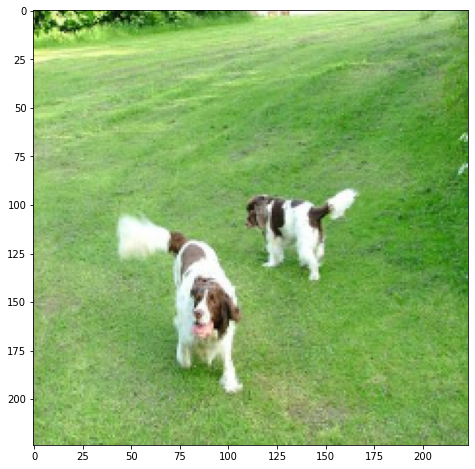

In [76]:
plt.figure()
plt.imshow(target_image[0])
plt.show()

In [129]:
import numpy as np
#target_index = np.argmax(preds[max_i])
target_index = 248 # eskimo dog
target_index = 207 # golden retriever
target_index = 250 # siberian husky


In [130]:
target_label = tf.one_hot(target_index, image_probs.shape[-1])
target_label = tf.reshape(target_label, (1, image_probs.shape[-1]))

In [131]:
# 공격 패턴 생성
target_perturbations = create_adversarial_pattern(image, target_label)

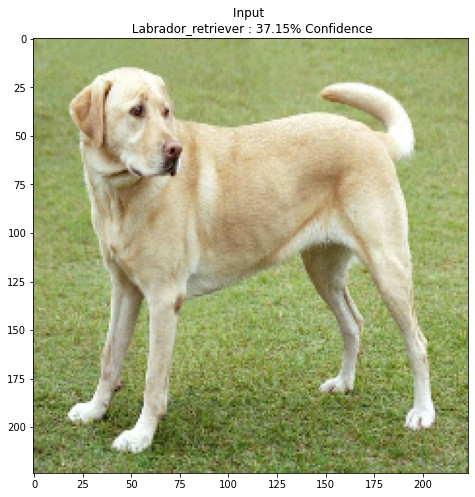

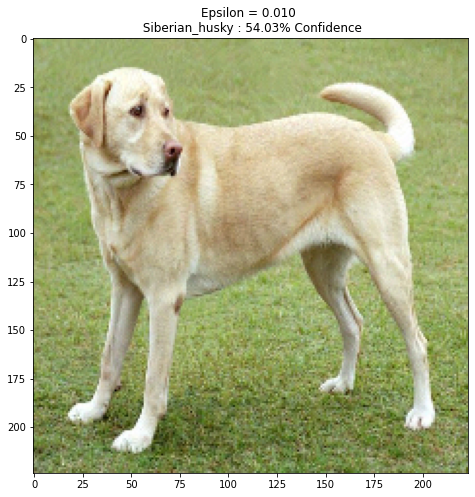

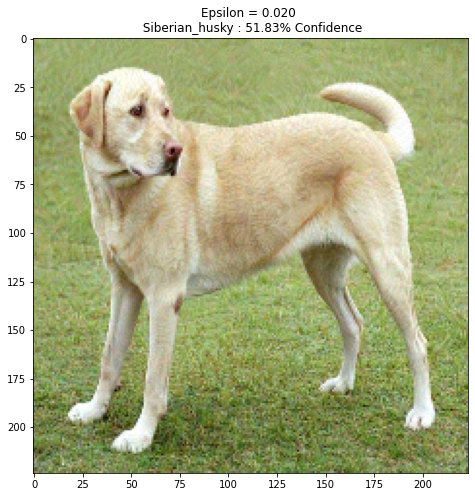

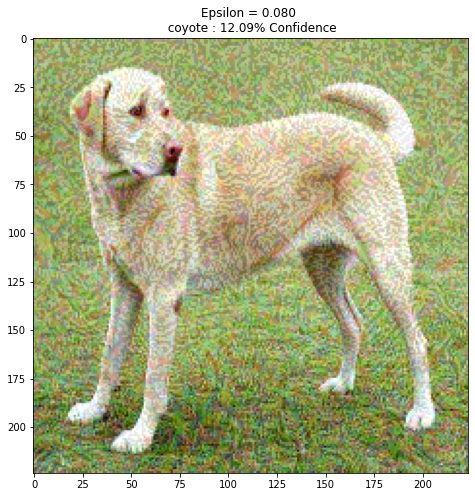

In [132]:
# epsilon을 변경하면서 결과 관찰
epsilons = [0, 0.01, 0.02, 0.08]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  #adv_x = image + eps*perturbations - eps*target_perturbations
  adv_x = image - eps*target_perturbations
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  display_images(adv_x, descriptions[i])

In [143]:
res = decode_predictions(image_probs, top=4)
print(res[0])
# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]
# top4만을 출력
print(top[:4])

# 추론 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)
    

[('n02099712', 'Labrador_retriever', 0.37154654), ('n02109961', 'Eskimo_dog', 0.06487835), ('n02099601', 'golden_retriever', 0.029010495), ('n02110185', 'Siberian_husky', 0.020057056)]
[208 248 207 250]

class name = Labrador_retriever , class index = 208
class name = Eskimo_dog , class index = 248
class name = golden_retriever , class index = 207
class name = Siberian_husky , class index = 250


array([208, 248, 207, 250])

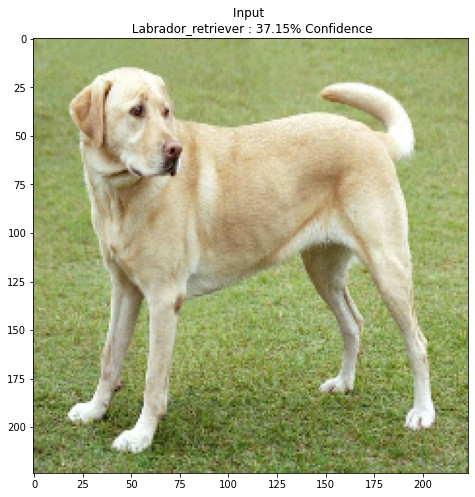

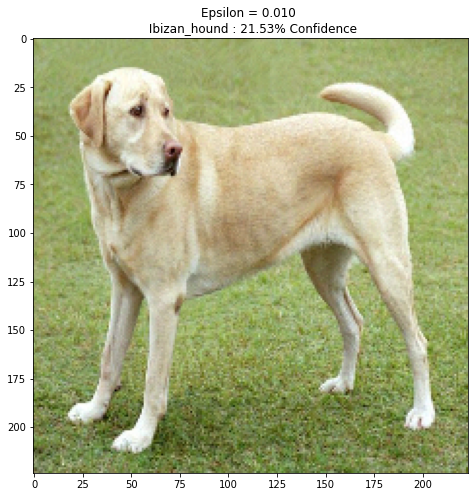

Ibizan_hound 0.21529235
[('n02099712', 'Labrador_retriever', 0.37154654), ('n02109961', 'Eskimo_dog', 0.06487835), ('n02099601', 'golden_retriever', 0.029010495), ('n02110185', 'Siberian_husky', 0.020057056)]
[208 248 207 250]

class name = Labrador_retriever , class index = 208
class name = Eskimo_dog , class index = 248
class name = golden_retriever , class index = 207
class name = Siberian_husky , class index = 250


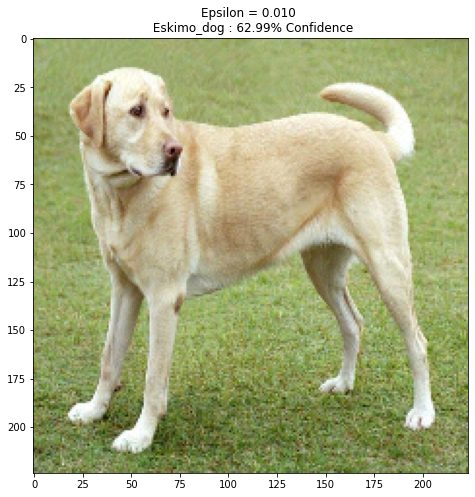

Eskimo_dog 0.6298622


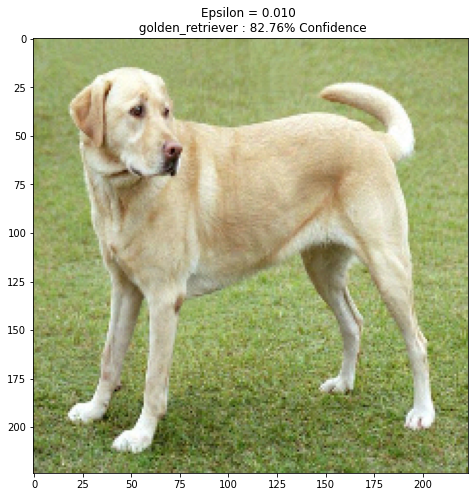

golden_retriever 0.8275941


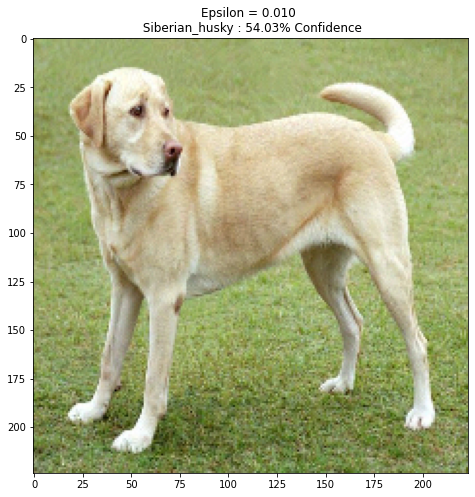

Siberian_husky 0.54033476


In [152]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                 weights='imagenet')
pretrained_model.trainable = False

# ImageNet 클래스 레이블
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# 이미지가 MobileNetV2에 사용하기 위한 level normalization 및 size normalization 함수
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255
  image = tf.image.resize(image, (224, 224))
  image = image[None, ...]
  return image

# 예측 결과로부터 top1을 뽑아서 라벨을 출력하는 함수
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

# Labrador Retreiver 이미지 불러오기
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
# 추론 
image_probs = pretrained_model.predict(image)

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # 입력 이미지에 대한 손실 함수의 기울기를 구합니다.
  gradient = tape.gradient(loss, input_image)
  # 왜곡을 생성하기 위해 그래디언트의 부호를 구합니다.
  signed_grad = tf.sign(gradient)
  return signed_grad

# 인식하고 이미지 출력하는 함수 (label과 confidence를 반환하도록 변경)
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0])
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()
  return label, confidence

# 이미지의 레이블 위치만 1로 설정 (기본적인 클래스 분류기 결과)
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

confidence1 = confidence2 = confidence3 = 0.

# 공격 패턴 생성
perturbations = create_adversarial_pattern(image, label)

epsilons = [0, 0.01, 0.1, 0.15]
# epsilon은 0.01로 고정
eps = epsilons[1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

#원본 인식 (epsilon = 0)
display_images(image, descriptions[0])

#공격 진행
adv_x = image + eps*perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)
label0, confidence0 = display_images(adv_x, descriptions[1]) # epsilon = 0.01

# FSGM 결과 
print(label0, confidence0)

res = decode_predictions(image_probs, top=4)
print(res[0])

# 추론결과(image_probs[0])를 역순으로 정렬
top = np.argsort(image_probs[0])[::-1]
# top4만을 출력
print(top[:4])

# 추론 결과의 top4의 label class 및 label index 출력
print()
for r, index in zip(res[0], top[:4]):
    print('class name =', r[1], ', class index =', index)

# model predict의 결과인 `image_probs[0]`에는 무엇이 들어있습니까? 
ans12 = '''
여기에 기입합니다.
'''

# np.argsort(image_probs[0])[::-1]는 무엇을 얻기 위한 것입니까?
ans13 = '''
여기에 기입합니다.
'''

# top2 결과인 `eskimo_dog`의 class index는 얼마입니까?
ans14 = -1 # 값을 변경해 주세요.

# 원본이미지를 인식하였을 때, 4번째로 높은 추론값을 가진 결과(top4)는 무엇이었습니까?
# 인덱스 값으로 적어 주세요
ans15 = -1 # 값을 변경해 주세요.

    
# 이곳에 top2 index를 이용한 공격 code snippte을 추가합니다.
#top2 용 label 생성
target1_index = 248 # eskimo dog
target1_label = tf.one_hot(target1_index, image_probs.shape[-1])
target1_label = tf.reshape(target1_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target1_perturbations = create_adversarial_pattern(image, target1_label)
adv_x = image - eps*target1_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)  
# 공격 패턴이 적용된 이미지 adv_x에 대한 추론 및 결과 디스플레이
label1, confidence1 = display_images(adv_x, descriptions[1])
# FSGM 결과 
print(label1, confidence1)

# 이곳에 top3 index를 이용한 code snippte을 수정하여 추가합니다.
#top2 용 label 생성
target2_index = 207 # golden retriever
target2_label = tf.one_hot(target2_index, image_probs.shape[-1])
target2_label = tf.reshape(target2_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target2_perturbations = create_adversarial_pattern(image, target2_label)
adv_x = image - eps*target2_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)  
# 공격 패턴이 적용된 이미지 adv_x에 대한 추론 및 결과 디스플레이
label2, confidence2 = display_images(adv_x, descriptions[1])
# FSGM 결과 
print(label2, confidence2)

# 이곳에 top4 index를 이용한 code snippte을 수정하여 추가합니다.
#top2 용 label 생성
target3_index = 250 # siberian huskey
target3_label = tf.one_hot(target3_index, image_probs.shape[-1])
target3_label = tf.reshape(target3_label, (1, image_probs.shape[-1]))
# top2용 공격 패턴 생성
target3_perturbations = create_adversarial_pattern(image, target3_label)
adv_x = image - eps*target3_perturbations
adv_x = tf.clip_by_value(adv_x, 0, 1)  
# 공격 패턴이 적용된 이미지 adv_x에 대한 추론 및 결과 디스플레이
label3, confidence3 = display_images(adv_x, descriptions[1])
# FSGM 결과 
print(label3, confidence3)

# 공격 결과 중 confidence score를 다음 변수에 기록합니다.
ans16 = confidence1 # top2 index를 이용한 공격결과의 confidence score
ans17 = confidence2 # top3 index를 이용한 공격결과의 confidence score
ans18 = confidence3 # top4 index를 이용한 공격결과의 confidence score
